In [2]:
import os
import gsw
import datetime
import numpy as np
import numpy as np
import pandas as pd
import seawater as sw
#import cmocean.cm as cmo
import matplotlib.pyplot as plt

/var/folders/n4/nk6k_c65111dd1zq088dqpb40000gn/T/ipykernel_12959/3480337663.py:7: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw


In [36]:
print(os.getcwd())
new_folder = "/Users/sydneyperkins/Heat Transfer-"
os.chdir(new_folder)
print("Current directory set to:", os.getcwd())

/Users/sydneyperkins


FileNotFoundError: [Errno 2] No such file or directory: '/Users/sydneyperkins/project_folder'

In [3]:
from glob import glob
from scipy.io import loadmat
#from pymatreader import read_mat
from mpl_toolkits import mplot3d
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
from scipy.ndimage import gaussian_filter1d as gfilter
from matplotlib.ticker import MaxNLocator, FormatStrFormatter
mat_data = loadmat('/Users/sydneyperkins/Downloads/ASTRAL_DBASIS_upper_CTDgrid.mat')
key = list(mat_data.keys())[-1]
data = mat_data[key][0]
time = data['std_profiles'][0]['time'][0][0].squeeze()
time = time[2:] # Removing areas with no data in the vector\n",
time = pd.to_datetime(time-719529, unit='D') # transforming the matlab time format (datenum) to the python time format (datetime)
time = np.delete(time,[927, 3780, 3781], 0) #deleting bad profiles
depth = data['std_profiles'][0]['P'][0][0];
depth = depth[20:381,2:] # Removing areas with no data
depth = np.delete(depth,[927, 3780, 3781], 1) #deleting bad profiles
vmin, vmax = np.round(np.nanmin(depth),2), np.round(np.nanmax(depth),2)
delta = .25
depth = np.arange(vmin, vmax + delta, delta) #recreating a depth vector that makes sense
time, depth = np.meshgrid(time, depth)
rho = data['std_profiles'][0]['rho'][0][0]; rho = rho[20:381,2:] #potential density
rho = np.delete(rho,[927, 3780, 3781], 1) #deleting bad profiles
sigma = rho-1e3
insitutemp = data['std_profiles'][0]['T'][0][0]; insitutemp = insitutemp[20:381,2:] # in-situ temperature
insitutemp = np.delete(insitutemp,[927, 3780, 3781], 1) #deleting bad profiles
SP = data['std_profiles'][0]['S'][0][0]; SP = SP[20:381,2:] #practical salinity
SP = np.delete(SP,[927, 3780, 3781], 1) #deleting bad profiles
P = data['std_profiles'][0]['P'][0][0]; P = P[20:381,2:] #Pressure
P = np.delete(P,[927, 3780, 3781], 1) #deleting bad profiles
SA = gsw.SA_from_SP(SP, depth, 85, 12) # computing absolutesalinity
temp = gsw.CT_from_t(SA, insitutemp, depth) # computing conservative temperature
gswrho = gsw.rho(SA,temp,P)
timez = time[:,1]

In [4]:
depth26= [] #creates an empty list in python so that we can later append values into it
for i in range(temp.shape[1]): #for all of the values in in temp.shape
    temp_profile= temp[:,i] #this is the temp profiles. Across all of the depths (:) for each individual (i) profiles
    index = np.argwhere(temp_profile > 26).argmax() # The indexs where the temp profile are larger than 26 (argwhere) and then argmax finds the first one
    depth26.append(depth[index,i]) #this adds the values of depth[index,i] which means in depth, the indexes found before across time to the list
depth26 = np.array(depth26)
print(depth26.shape)

(3779,)


In [5]:
index26= []
depth26= []    #creates an empty list in python so that we can later append values into it
for i in range(temp.shape[1]):      #for all of the values in in temp.shape
    temp_profile= temp[:,i]        #making temp profile, across all depth for each time profile
    index26nonvect = np.argwhere(temp_profile > 26).argmax()    #index of each mixed layer depth
    index26.append(index26nonvect) #list of mixed layer depth
    depth26.append(depth[index26nonvect,i])
depth26=np.array(depth26)
print(depth26.shape)

(3779,)


In [6]:
firstdepthrho03= []
mldrho03 = []
for i in range(rho.shape[1]):
    matcha = np.where(~np.isnan(rho[:,i]))[0]
    firstrho03 = rho[matcha, i]
    mlrho03 = firstrho03[0]+.03

    indexmldrho03 = np.argmax(firstrho03 >= mlrho03)
    firstdepthrho03.append(depth[matcha[0],i])
    mldrho03.append(depth[matcha[indexmldrho03], i])

In [7]:
firstdepthrho03= []
mldrho03 = []
for i in range(rho.shape[1]):
    matcha = np.where(~np.isnan(rho[:,i]))[0]
    firstrho03 = rho[matcha, i]
    mlrho03 = firstrho03[0]+.03
    indexmldrho03 = np.argmax(firstrho03 >= mlrho03)
    firstdepthrho03.append(depth[matcha[0],i])
    mldrho03.append(depth[matcha[indexmldrho03], i])

In [8]:
mldrho125 = []
for i in range(rho.shape[1]):
    chai = np.where(~np.isnan(rho[:,i]))[0] #
    firstrho125 = rho[chai, i]
    mlrho125 = firstrho125[0]+.125
    indexmldrho125= np.argmax(firstrho125 >= mlrho125)
    mldrho125.append(depth[chai[indexmldrho125], i])

In [9]:
mldrho03 =np.array(mldrho03)
mldrho125 = np.array(mldrho125)
depth26 = np.array(depth26)

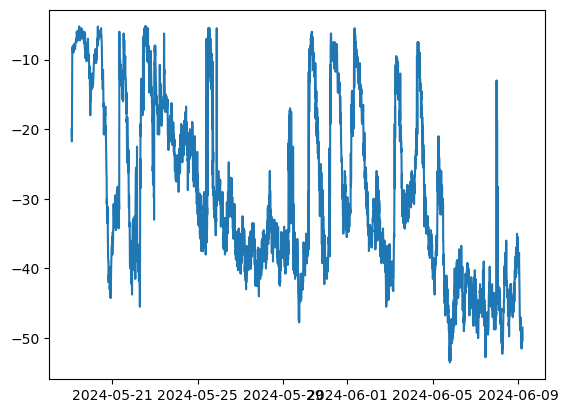

In [10]:
timez= time[0,:]
plt.plot(timez,-mldrho03)

In [11]:
#calculating N^2
import numpy as np
import seawater as swe
#N2= swe.N(sw.bfrq(Sa, temp, P, lat)[0])

In [12]:
totalrhomean= np.nanmean(rho)
print(totalrhomean)

bouyancy= (9.8*rho)/totalrhomean

rhogradient= np.gradient(rho, axis=0, edge_order=1)/-.25

rhogradient.shape

N2= ((rhogradient*-9.8)/totalrhomean)
N2.shape, depth.shape

1021.0556464993723


((361, 3779), (361, 3779))

In [13]:
n2max=np.nanmin(np.log10(N2))

/var/folders/n4/nk6k_c65111dd1zq088dqpb40000gn/T/ipykernel_12959/2634408117.py:1: RuntimeWarning: invalid value encountered in log10
  n2max=np.nanmin(np.log10(N2))


/var/folders/n4/nk6k_c65111dd1zq088dqpb40000gn/T/ipykernel_12959/3471401933.py:4: RuntimeWarning: invalid value encountered in log10
  plt.pcolormesh(time, -depth, np.log10(N2), vmin=-2, vmax=-10)
/var/folders/n4/nk6k_c65111dd1zq088dqpb40000gn/T/ipykernel_12959/3471401933.py:7: UserWarning: The following kwargs were not used by contour: 'label'
  contour = plt.contour(time, -depth, temp, levels=[26],


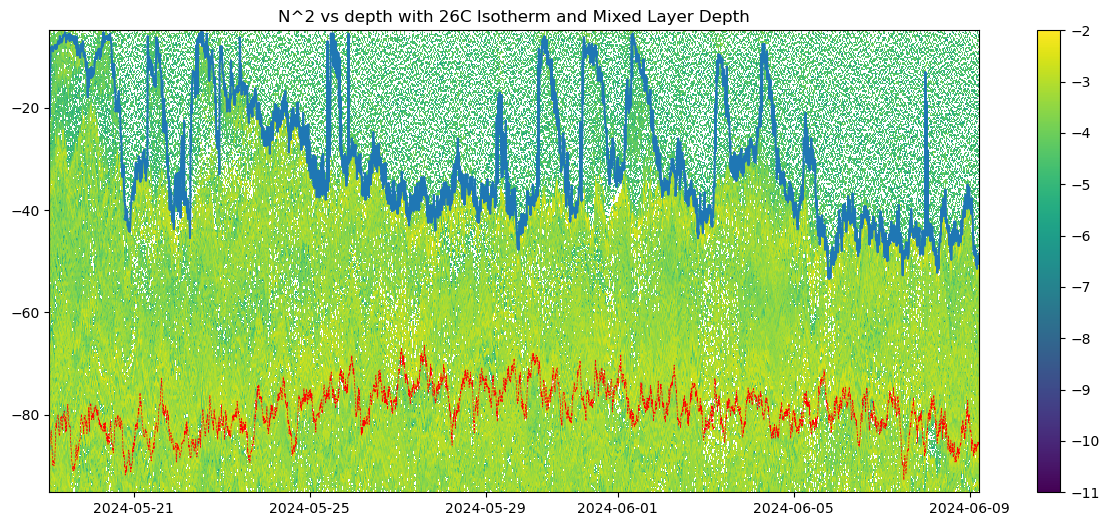

In [14]:
# plt.pcolor(time, -depth, N2)
N2[N2 <0] == 0
plt.figure(figsize=(15, 6))
plt.pcolormesh(time, -depth, np.log10(N2), vmin=-2, vmax=-10)
plt.colorbar()
plt.plot(timez,-mldrho03, label = 'Mixed Layer Depth (rho +.03')
contour = plt.contour(time, -depth, temp, levels=[26],
colors='red', linestyles='--', linewidths=.5, label = '26C Isotherm')
plt.title('N^2 vs depth with 26C Isotherm and Mixed Layer Depth')
plt.savefig('N2vsdepthwith26andmixedlayerdepth.png')

In [15]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import cmocean as cmo

In [34]:
#os.path.exists(save_folder)
#os.makedirs(save_folder)
#print(f"Created folder: {save_folder}")
#save_folder = os.path.join(os.getcwd(), "images")
os.getcwd()


'/Users/sydneyperkins'

/var/folders/n4/nk6k_c65111dd1zq088dqpb40000gn/T/ipykernel_12959/2621254194.py:10: UserWarning: The following kwargs were not used by contour: 'label'
  contour = plt.contour(time, -depth, temp, levels=[26],


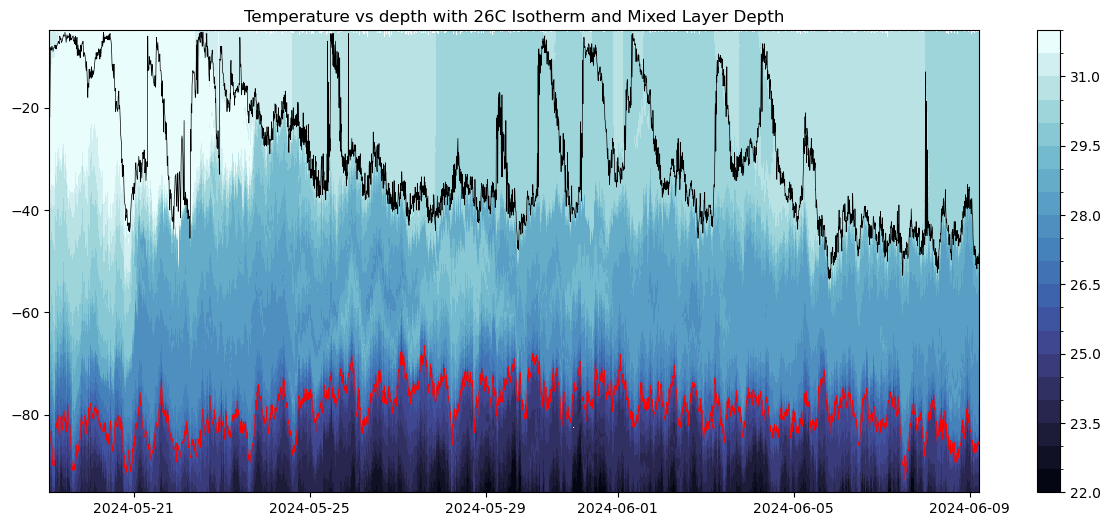

In [30]:
vmin, vmax = 22, 32
levels = MaxNLocator(nbins=20).tick_values(vmin, vmax)
cmap = plt.get_cmap(cmo.cm.ice)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
plt.figure(figsize=(15, 6))
plt.pcolormesh(timez, -depth, temp, cmap=cmap, norm=norm)
plt.colorbar()
plt.plot(timez,-mldrho03, color= 'black', linestyle='-',
linewidth= 0.5, label = 'Mixed Layer Depth')
contour = plt.contour(time, -depth, temp, levels=[26],
colors='red', linestyles='-', linewidths=.5, label = '26C Isotherm')
plt.title('Temperature vs depth with 26C Isotherm and Mixed Layer Depth')
plt.savefig(os.path.join(save_folder, "tempdepth03isolines.png"))

/var/folders/n4/nk6k_c65111dd1zq088dqpb40000gn/T/ipykernel_12959/1086556445.py:7: RuntimeWarning: invalid value encountered in log10
  plt.pcolormesh(time, -depth, np.log10(N2), cmap=cmap, norm=norm)
/var/folders/n4/nk6k_c65111dd1zq088dqpb40000gn/T/ipykernel_12959/1086556445.py:10: UserWarning: The following kwargs were not used by contour: 'label'
  contour = plt.contour(time, -depth, temp, levels=[26],


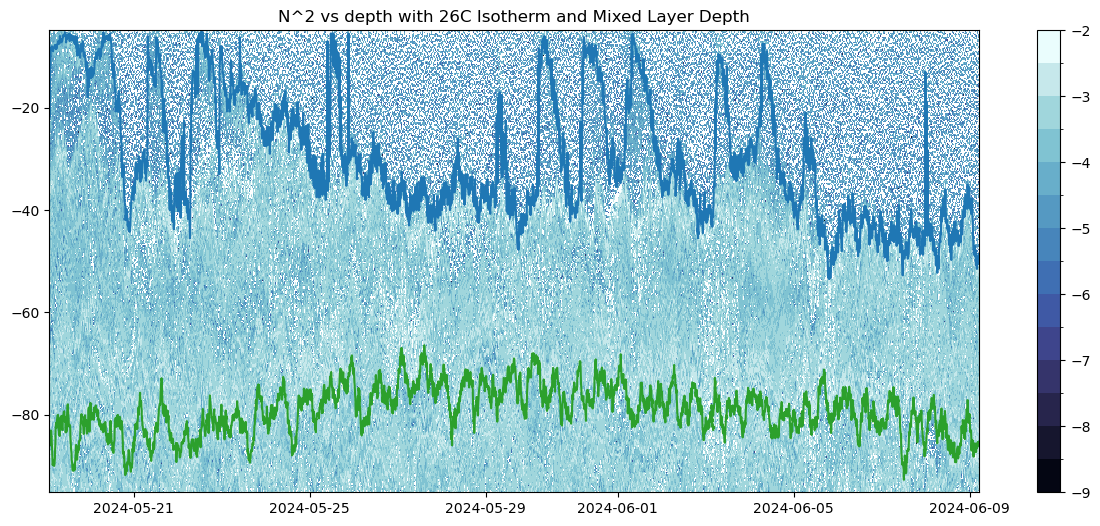

In [32]:
N2[N2 <0] == 0
vmin, vmax = -9, -2
levels = MaxNLocator(nbins=16).tick_values(vmin, vmax)
cmap = plt.get_cmap(cmo.cm.ice)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
plt.figure(figsize=(15, 6))
plt.pcolormesh(time, -depth, np.log10(N2), cmap=cmap, norm=norm)
plt.colorbar()
plt.plot(timez,-mldrho03, label = 'Mixed Layer Depth')
contour = plt.contour(time, -depth, temp, levels=[26],
colors='tab:green', linestyles='-', linewidths=1.5, label ='26C Isotherm')
plt.title('N^2 vs depth with 26C Isotherm and Mixed Layer Depth')
plt.savefig(os.path.join(save_folder, "N203isolin.png"))

/var/folders/n4/nk6k_c65111dd1zq088dqpb40000gn/T/ipykernel_12959/1316183774.py:2: RuntimeWarning: invalid value encountered in log10
  plt.pcolormesh(time, -depth, np.log10(N2), vmin=-2, vmax=-10)
/var/folders/n4/nk6k_c65111dd1zq088dqpb40000gn/T/ipykernel_12959/1316183774.py:5: UserWarning: The following kwargs were not used by contour: 'label'
  contour = plt.contour(time, -depth, temp, levels=[26], colors='red', linestyles='-', linewidths=.5, label = '26C Isotherm')


Text(0.5, 1.0, 'N^2 vs depth with 26C Isotherm and Mixed Layer Depth')

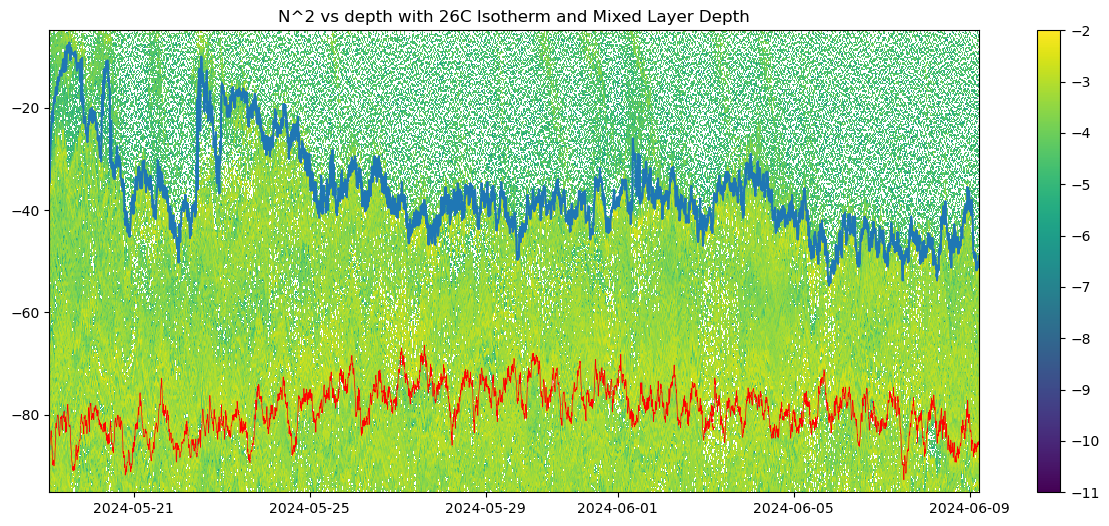

In [18]:
plt.figure(figsize=(15, 6))
plt.pcolormesh(time, -depth, np.log10(N2), vmin=-2, vmax=-10)
plt.colorbar()
plt.plot(timez,-mldrho125, label = 'Mixed Layer Depth')
contour = plt.contour(time, -depth, temp, levels=[26], colors='red', linestyles='-', linewidths=.5, label = '26C Isotherm')
plt.title('N^2 vs depth with 26C Isotherm and Mixed Layer Depth')

/var/folders/n4/nk6k_c65111dd1zq088dqpb40000gn/T/ipykernel_12959/1311177361.py:2: RuntimeWarning: invalid value encountered in log10
  plt.pcolor(time, -depth, np.log10(N2), vmin=-2, vmax=-10)
/var/folders/n4/nk6k_c65111dd1zq088dqpb40000gn/T/ipykernel_12959/1311177361.py:5: UserWarning: The following kwargs were not used by contour: 'label'
  contour = plt.contour(time, -depth, temp, levels=[26],


Text(0.5, 1.0, 'N^2 vs depth with 26C Isotherm and Mixed Layer Depth')

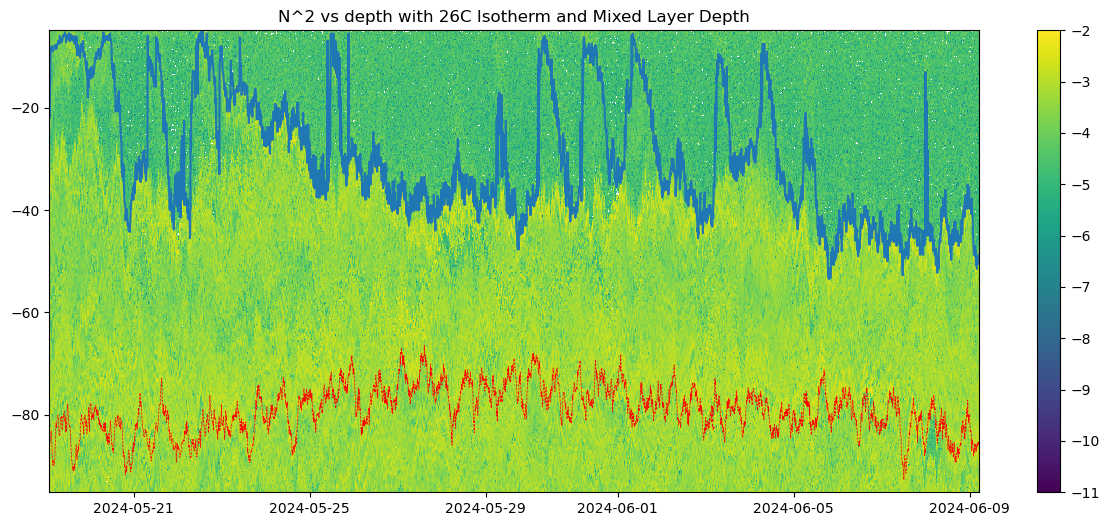

In [20]:
plt.figure(figsize=(15, 6))
plt.pcolor(time, -depth, np.log10(N2), vmin=-2, vmax=-10)
plt.colorbar()
plt.plot(timez,-mldrho03, label = 'Mixed Layer Depth')
contour = plt.contour(time, -depth, temp, levels=[26],
colors='red', linestyles='--', linewidths=.5, label = '26C Isotherm')
plt.title('N^2 vs depth with 26C Isotherm and Mixed Layer Depth')
plt.save()

In [ ]:
N2[N2 <0] == 0
vmin, vmax = -9, -2
levels = MaxNLocator(nbins=16).tick_values(vmin, vmax)
cmap = plt.get_cmap(cmo.cm.ice)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
plt.figure(figsize=(15, 6))
plt.pcolormesh(time, -depth, np.log10(N2), cmap=cmap, norm=norm)
plt.colorbar(label= 'log10 (N^2)') #plt.colorbar.set_label('log10 (N^2)')
plt.plot(timez,-mldrho03, color = 'grey',label = 'Mixed Layer Depth (rho+0.03 metric)')
plt.plot(timez,-mldrho125, color= 'black', label = 'Mixed Layer Depth (rho+0.125 metric)')
#plt.contour(time, -depth, temp, levels=[26], colors='tab:red', linestyles='-', linewidths=1.5, label = '26C Isotherm')
plt.plot(timez, -depth26, color='tab:red', linewidth=1, label ='26 °C Isotherm')
#plt.title('N^2 vs depth with 26C Isotherm and Mixed LayerDepth')
plt.legend(bbox_to_anchor=(1.13, 1), loc='upper left')
plt.xlabel('Time')
plt.ylabel('Depth (m)')
plt.savefig('N2vsdepthwith26andmixedlayerdepthcmap.png')

In [ ]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import cmocean as cmo
tnrfont = {'fontname':'Times New Roman'}
vmin, vmax = 22, 32
levels = MaxNLocator(nbins=20).tick_values(vmin, vmax)
cmap = plt.get_cmap(cmo.cm.ice)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
plt.figure(figsize=(15, 6))
plt.pcolormesh(timez, -depth, temp, cmap=cmap, norm=norm)
cb = plt.colorbar()
cb.set_label('Temperature °C', labelpad= 7, size=13)
plt.plot(timez,-mldrho03, color = 'grey',label = 'Mixed Layer Depth (rho+0.03 metric)')
plt.plot(timez,-mldrho125, color= 'black', label = 'Mixed Layer Depth (rho+0.125 metric)')
#plt.contour(time, -depth, temp, levels=[26], colors='tab:red', linestyles='-', linewidths=1.5, label = '26C Isotherm')
plt.plot(timez, -depth26, color='tab:red', linewidth=1, label = '26 °C Isotherm')
#plt.title('N^2 vs depth with 26C Isotherm and Mixed Layer Depth')
plt.legend(bbox_to_anchor=(.06, -.1), loc='upper left',ncol= 3)

# plt.xlabel('Time', fontsize= 15, **tnrfont)
plt.xlabel('Time', fontsize= 13)
plt.ylabel('Depth (m)', fontsize= 13)
plt.yticks(fontsize=14)
plt.xticks(fontsize=13)
plt.xlim([datetime.datetime(2024, 5, 19, 00, 50), datetime.datetime(2024, 6, 9, 6,10)])
contour = plt.contour(time, -depth, temp, levels=[26], colors='red', linestyles='--', linewidths=.5, label = '26C Isotherm')
plt.title('Figure 3. Temperature with 26°C Isotherm and Mixed Layer Depth')
#plt.savefig('Temp-mld-26.png', dpi= 700)

In [ ]:
plt.figure(figsize=(15, 6))
plt.axhline(y=0, color='darkgrey', label = 'Mixed Layer Depth (rho+0.03 metric)')
plt.axhline(y=0, color='darkgrey',label = 'Mixed Layer Depth (rho+0.125 metric)')
plt.axhline(y=0, color='darkgrey', linewidth=1, label = '26 °C Isotherm')
plt.legend(bbox_to_anchor=(.06, .9), loc='upper left',ncol= 3)
plt.axhline(y=0, color='darkgrey')
plt.xlabel('Time', fontsize= 13)
plt.ylabel('Depth (m)', fontsize= 13)
plt.yticks(fontsize=14)
plt.xticks(fontsize=13)
plt.xlim([datetime.datetime(2024, 5, 19, 00, 50), datetime.datetime(2024, 6, 9, 6,10)])
contour = plt.contour(time, -depth, temp, levels=[26], colors='red', linestyles='--', linewidths=.5, label = '26C Isotherm')
plt.title('Temperature vs depth with 26C Isotherm and Mixed Layer Depth')
#plt.savefig('Temp-mld-26legend.png', dpi= 700)

In [ ]:
import scipy.integrate as integrate
from scipy.integrate import quad
from scipy.integrate import trapezoid, simpson

In [ ]:
Qc= 1/.25
Q= rho*temp

integrated_values = np.trapezoid(rho*temp, depth, axis=0)
print(integrated_values)
integrated_values.shape

In [ ]:
Cp = gsw.cp_t_exact(SA, temp, P) #specific heat capacity
Cpmean= np.nanmean(Cp) # mean specific heat capacity

In [ ]:
eq= rho*temp 
integrated_values_simps = simpson(eq, depth, axis=0) #needed for ocean heat quantity 

In [ ]:
simpint =integrated_values_simps*40.070979312864495
integrated_values_mld = simpson(eq, depth, axis=0)
eq.shape


In [ ]:
#calculating from the top to the 26 mark
for i in range(temp.shape[1]):
#temp_profile= temp[:,i]
#index26 = np.argwhere(temp_profile1 > 26).argmax()
    xvaluestot = depth[0:index26[i],i]
    data_subsettot = eq[0:index26[i], i]
    integrated_value = simpson(data_subsettot, xvaluestot, axis=0)
    integrated_values[i] = integrated_value
print(integrated_value)

In [ ]:
integratednew_values = np.zeros(temp.shape[1])
#calculating from the mld to the 26 mark
for i in range(temp.shape[1]):
#temp_profile= temp[:,i]
#index26 = np.argwhere(temp_profile2 > 26).argmax()
    xvalues26 = depth[0:index26[i],i]
# chai = np.where(~np.isnan(rho[:,i]))[0]
# firstrho125 = rho[chai, i]
# mlrho125 = firstrho125[0]+.125
# indexmldrho125= np.argmax(firstrho125 >= mlrho125)
    xvaluesmldrho26125 = depth[indexmldrho125:index26[i],i]
    data_subsetmldrho26125 = eq[indexmldrho125:index26[i],i]
    integratednew_value= simpson(data_subsetmldrho26125, xvaluesmldrho26125, axis=0)
    integratednew_values[i] = integratednew_value